In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [2]:
# Code starts here

train = pd.read_csv('train.csv')

print(train.shape)
print(train.info())
print(train.describe())

# Code ends here.

(9072, 56)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9072 entries, 0 to 9071
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  9072 non-null   int64
 1   Elevation                           9072 non-null   int64
 2   Aspect                              9072 non-null   int64
 3   Slope                               9072 non-null   int64
 4   Horizontal_Distance_To_Hydrology    9072 non-null   int64
 5   Vertical_Distance_To_Hydrology      9072 non-null   int64
 6   Horizontal_Distance_To_Roadways     9072 non-null   int64
 7   Hillshade_9am                       9072 non-null   int64
 8   Hillshade_Noon                      9072 non-null   int64
 9   Hillshade_3pm                       9072 non-null   int64
 10  Horizontal_Distance_To_Fire_Points  9072 non-null   int64
 11  Wilderness_Area1                    9072 non-null   int64


In [3]:
# choose categorical and continuous features from data

categorical_columns = [c for c in train.columns 
                       if train[c].dtype.name == 'object']
numerical_columns = [c for c in train.columns 
                     if train[c].dtype.name != 'object']

print('categorical_columns:', categorical_columns)
print('numerical_columns:', numerical_columns)

categorical_columns: []
numerical_columns: ['Id', 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']


### EDA & Data Preprocessing

- The target is the only categorical feature consisting of 7 classes and all the other features are continuous. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots. 

<AxesSubplot:>

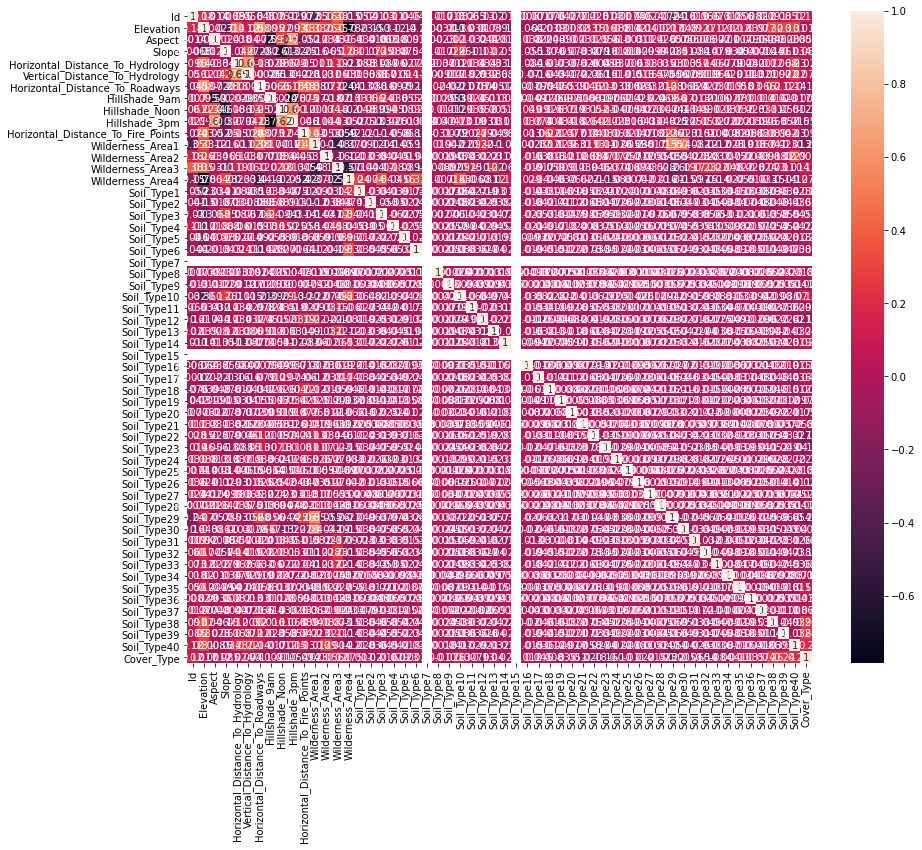

In [7]:
# Correlation matrix for training set
corr = train.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(14,12))
sns.heatmap(corr,annot=True)

In [8]:
print(train.skew())

train.drop(['Id','Soil_Type7','Soil_Type15'],1,inplace=True)

Id                                     0.002893
Elevation                              0.071829
Aspect                                 0.453036
Slope                                  0.536479
Horizontal_Distance_To_Hydrology       1.469340
Vertical_Distance_To_Hydrology         1.530355
Horizontal_Distance_To_Roadways        1.248358
Hillshade_9am                         -1.115988
Hillshade_Noon                        -0.961365
Hillshade_3pm                         -0.332192
Horizontal_Distance_To_Fire_Points     1.647477
Wilderness_Area1                       1.220795
Wilderness_Area2                       5.232999
Wilderness_Area3                       0.323882
Wilderness_Area4                       0.834809
Soil_Type1                             6.082981
Soil_Type2                             4.651335
Soil_Type3                             3.642825
Soil_Type4                             3.904306
Soil_Type5                             9.416832
Soil_Type6                             4

### Feature Selection and Model building

- Separate the features and target and then split the train data into train and validation set.
- Apply different models of your choice and  then predict on the validation data and find the `accuracy_score` for this prediction.
- Try improving upon the `accuracy_score` using different feature selection techniques like wrapper methods, PCA and try using hyperparameter tuning to find the parameters that give the best accuracy.

In [9]:
# Code Starts here

# Split into features and target
X = train.iloc[:,:-1]
y = train.iloc[:,-1]

# Separate into train and test data
X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=42,test_size=0.2)

# Code ends here

In [11]:
# Fitting a Random Forest model on the train data and predict on the train-validation data.
model = RandomForestClassifier(n_estimators=100,random_state=8,n_jobs=4)
rfe = RFE(model, 42)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_val_rfe = rfe.transform(X_val)
model.fit(X_train_rfe,y_train)
y_pred_rfe = model.predict(X_val_rfe)
print(accuracy_score(y_val,y_pred_rfe))

0.8369146005509642


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [12]:
# Code starts here

test = pd.read_csv('test.csv')
# Storing the id from the test file
id_ = test['Id']

# Dropping the same columns from the test data
test.drop(['Id','Soil_Type7','Soil_Type15'],1,inplace=True)

# Applying rfe on test data
test_rfe = rfe.transform(test)

# Predict on the test data
y_pred_test = model.predict(test_rfe)

# Create a sample submission file
final_submission = pd.DataFrame({'Id':id_,'Cover_Type':y_pred_test})

# Convert the sample submission file into a csv file
final_submission.to_csv('final_submission.csv',index=False)

# Code ends here